RUSHIKESH SANJIV TANKSALE.
712222014 Deep Learning 2022-23 SEM II.

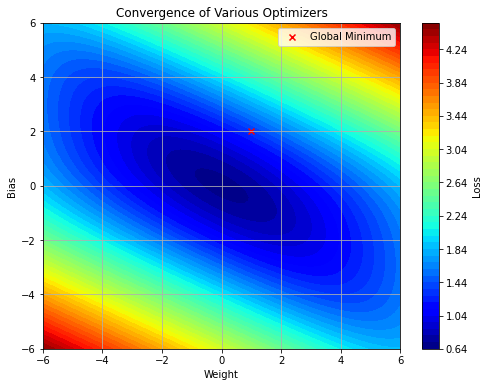

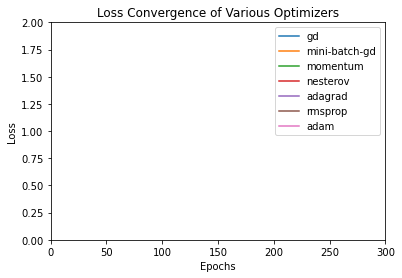

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class SigmoidNeuron:
    def __init__(self):
        self.W = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        if self.W is None or self.b is None:
            raise ValueError("Model parameters are not initialized.")
        return self.sigmoid(np.dot(X, self.W) + self.b)

    def compute_loss(self, y_true, y_pred):
        y_true = y_true.reshape(-1, 1)  # Reshape y_true to (4, 1)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def compute_gradients(self, X, y_true):
        m = X.shape[0]
        y_pred = self.forward(X)
        dW = np.dot(X.T, (y_pred - y_true)) / m
        db = np.sum(y_pred - y_true) / m
        return dW, db

    def fit(self, X, y, optimizer='gd', learning_rate=0.01, epochs=100, batch_size=32, gamma=0.9, epsilon=1e-8, beta1=0.9, beta2=0.999):
        self.W = np.random.randn(X.shape[1])
        self.b = 0

        if optimizer == 'gd':
            self.gradient_descent(X, y, learning_rate, epochs)
        elif optimizer == 'mini-batch-gd':
            self.mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size)
        elif optimizer == 'momentum':
            self.momentum_gradient_descent(X, y, learning_rate, epochs, gamma)
        elif optimizer == 'nesterov':
            self.nesterov_accelerated_gd(X, y, learning_rate, epochs, gamma)
        elif optimizer == 'adagrad':
            self.adagrad(X, y, learning_rate, epochs, epsilon)
        elif optimizer == 'rmsprop':
            self.rmsprop(X, y, learning_rate, epochs, gamma, epsilon)
        elif optimizer == 'adam':
            self.adam(X, y, learning_rate, epochs, beta1, beta2, epsilon)
        else:
            raise ValueError("Invalid optimizer specified.")

    def gradient_descent(self, X, y, learning_rate, epochs):
        losses = []
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            self.W -= learning_rate * dW
            self.b -= learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def mini_batch_gradient_descent(self, X, y, learning_rate, epochs, batch_size):
        losses = []
        m = X.shape[0]
        for epoch in range(epochs):
            indices = np.random.permutation(m)
            for i in range(0, m, batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch, y_batch = X[batch_indices], y[batch_indices]
                dW, db = self.compute_gradients(X_batch, y_batch)
                self.W -= learning_rate * dW
                self.b -= learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def momentum_gradient_descent(self, X, y, learning_rate, epochs, gamma):
        losses = []
        velocity_W, velocity_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            velocity_W = gamma * velocity_W + learning_rate * dW
            velocity_b = gamma * velocity_b + learning_rate * db
            self.W -= velocity_W
            self.b -= velocity_b
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def nesterov_accelerated_gd(self, X, y, learning_rate, epochs, gamma):
        losses = []
        velocity_W, velocity_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            velocity_W = gamma * velocity_W + learning_rate * dW
            velocity_b = gamma * velocity_b + learning_rate * db
            self.W -= gamma * velocity_W + learning_rate * dW
            self.b -= gamma * velocity_b + learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def adagrad(self, X, y, learning_rate, epochs, epsilon):
        losses = []
        cache_W, cache_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            cache_W += dW**2
            cache_b += db**2
            self.W -= learning_rate * dW / (np.sqrt(cache_W) + epsilon)
            self.b -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def rmsprop(self, X, y, learning_rate, epochs, gamma, epsilon):
        losses = []
        cache_W, cache_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            cache_W = gamma * cache_W + (1 - gamma) * dW**2
            cache_b = gamma * cache_b + (1 - gamma) * db**2
            self.W -= learning_rate * dW / (np.sqrt(cache_W) + epsilon)
            self.b -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def adam(self, X, y, learning_rate, epochs, beta1, beta2, epsilon):
        losses = []
        m_W, m_b = np.zeros_like(self.W), 0
        v_W, v_b = np.zeros_like(self.W), 0
        t = 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            t += 1
            m_W = beta1 * m_W + (1 - beta1) * dW
            m_b = beta1 * m_b + (1 - beta1) * db
            v_W = beta2 * v_W + (1 - beta2) * dW**2
            v_b = beta2 * v_b + (1 - beta2) * db**2
            m_W_hat = m_W / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_W_hat = v_W / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)
            self.W -= learning_rate * m_W_hat / (np.sqrt(v_W_hat) + epsilon)
            self.b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

# Helper function to create 2D contour plot
def plot_contour(X, Y, Z, title):
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='jet')
    plt.colorbar(label='Loss')
    plt.xlabel('Weight')
    plt.ylabel('Bias')
    plt.title(title)
    plt.scatter(1, 2, color='red', marker='x', label='Global Minimum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate data for contour plot
def generate_data():
    weight_range = np.linspace(-6, 6, 100)
    bias_range = np.linspace(-6, 6, 100)
    W, B = np.meshgrid(weight_range, bias_range)
    loss = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            sigmoid_neuron = SigmoidNeuron()
            sigmoid_neuron.W = W[i, j]
            sigmoid_neuron.b = B[i, j]
            loss[i, j] = sigmoid_neuron.compute_loss(y, sigmoid_neuron.forward(X))

    return W, B, loss

# Animation function for convergence visualization
def animate(i):
    for optimizer in optimizers:
        losses[optimizer].append(sigmoid_neuron[optimizer].compute_loss(y, sigmoid_neuron[optimizer].forward(X)))
        line[optimizer].set_data(range(len(losses[optimizer])), losses[optimizer])
    return [line[optimizer] for optimizer in optimizers]

# Main code
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

optimizers = ['gd', 'mini-batch-gd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']
sigmoid_neuron = {optimizer: SigmoidNeuron() for optimizer in optimizers}
losses = {optimizer: [] for optimizer in optimizers}

# Train the sigmoid neuron with various optimizers
for optimizer in optimizers:
    sigmoid_neuron[optimizer].fit(X, y, optimizer=optimizer, learning_rate=0.1, epochs=300)

# Create 2D contour plot
W, B, loss = generate_data()
plot_contour(W, B, loss, "Convergence of Various Optimizers")

# Create animation to visualize convergence
fig, ax = plt.subplots()
line = {optimizer: ax.plot([], [], label=optimizer)[0] for optimizer in optimizers}
ax.set_xlim(0, 300)
ax.set_ylim(0, 2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss Convergence of Various Optimizers')
ax.legend(loc='upper right')

animation = FuncAnimation(fig, animate, frames=300, interval=200, blit=True)
plt.show()


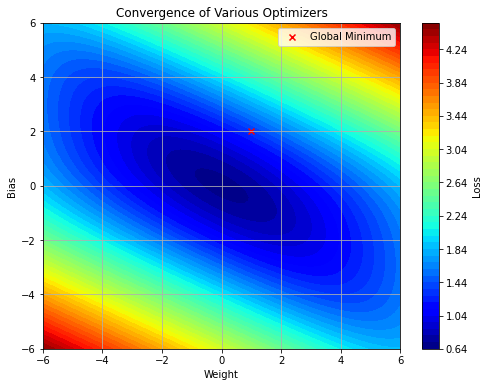

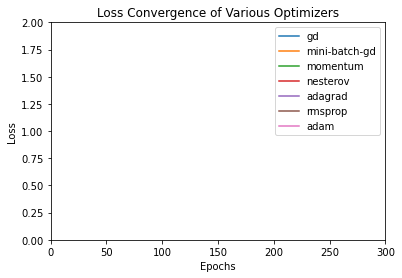

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class SigmoidNeuron:
    def __init__(self):
        self.W = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        if self.W is None or self.b is None:
            raise ValueError("Model parameters are not initialized.")
        return self.sigmoid(np.dot(X, self.W) + self.b)

    def compute_loss(self, y_true, y_pred):
        y_true = y_true.reshape(-1, 1)  # Reshape y_true to (4, 1)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def compute_gradients(self, X, y_true):
        m = X.shape[0]
        y_pred = self.forward(X)
        dW = np.dot(X.T, (y_pred - y_true)) / m
        db = np.sum(y_pred - y_true) / m
        return dW, db

    def fit(self, X, y, optimizer='gd', learning_rate=0.01, epochs=100, batch_size=32, gamma=0.9, epsilon=1e-8, beta1=0.9, beta2=0.999):
        self.W = np.random.randn(X.shape[1])
        self.b = 0

        if optimizer == 'gd':
            self.gradient_descent(X, y, learning_rate, epochs)
        elif optimizer == 'mini-batch-gd':
            self.mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size)
        elif optimizer == 'momentum':
            self.momentum_gradient_descent(X, y, learning_rate, epochs, gamma)
        elif optimizer == 'nesterov':
            self.nesterov_accelerated_gd(X, y, learning_rate, epochs, gamma)
        elif optimizer == 'adagrad':
            self.adagrad(X, y, learning_rate, epochs, epsilon)
        elif optimizer == 'rmsprop':
            self.rmsprop(X, y, learning_rate, epochs, gamma, epsilon)
        elif optimizer == 'adam':
            self.adam(X, y, learning_rate, epochs, beta1, beta2, epsilon)
        else:
            raise ValueError("Invalid optimizer specified.")

    def gradient_descent(self, X, y, learning_rate, epochs):
        losses = []
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            self.W -= learning_rate * dW
            self.b -= learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def mini_batch_gradient_descent(self, X, y, learning_rate, epochs, batch_size):
        losses = []
        m = X.shape[0]
        for epoch in range(epochs):
            indices = np.random.permutation(m)
            for i in range(0, m, batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch, y_batch = X[batch_indices], y[batch_indices]
                dW, db = self.compute_gradients(X_batch, y_batch)
                self.W -= learning_rate * dW
                self.b -= learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def momentum_gradient_descent(self, X, y, learning_rate, epochs, gamma):
        losses = []
        velocity_W, velocity_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            velocity_W = gamma * velocity_W + learning_rate * dW
            velocity_b = gamma * velocity_b + learning_rate * db
            self.W -= velocity_W
            self.b -= velocity_b
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def nesterov_accelerated_gd(self, X, y, learning_rate, epochs, gamma):
        losses = []
        velocity_W, velocity_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            velocity_W = gamma * velocity_W + learning_rate * dW
            velocity_b = gamma * velocity_b + learning_rate * db
            self.W -= gamma * velocity_W + learning_rate * dW
            self.b -= gamma * velocity_b + learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def adagrad(self, X, y, learning_rate, epochs, epsilon):
        losses = []
        cache_W, cache_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            cache_W += dW**2
            cache_b += db**2
            self.W -= learning_rate * dW / (np.sqrt(cache_W) + epsilon)
            self.b -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def rmsprop(self, X, y, learning_rate, epochs, gamma, epsilon):
        losses = []
        cache_W, cache_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            cache_W = gamma * cache_W + (1 - gamma) * dW**2
            cache_b = gamma * cache_b + (1 - gamma) * db**2
            self.W -= learning_rate * dW / (np.sqrt(cache_W) + epsilon)
            self.b -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def adam(self, X, y, learning_rate, epochs, beta1, beta2, epsilon):
        losses = []
        m_W, m_b = np.zeros_like(self.W), 0
        v_W, v_b = np.zeros_like(self.W), 0
        t = 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            t += 1
            m_W = beta1 * m_W + (1 - beta1) * dW
            m_b = beta1 * m_b + (1 - beta1) * db
            v_W = beta2 * v_W + (1 - beta2) * dW**2
            v_b = beta2 * v_b + (1 - beta2) * db**2
            m_W_hat = m_W / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_W_hat = v_W / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)
            self.W -= learning_rate * m_W_hat / (np.sqrt(v_W_hat) + epsilon)
            self.b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

# Helper function to create 2D contour plot
def plot_contour(X, Y, Z, title):
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='jet')
    plt.colorbar(label='Loss')
    plt.xlabel('Weight')
    plt.ylabel('Bias')
    plt.title(title)
    plt.scatter(1, 2, color='red', marker='x', label='Global Minimum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate data for contour plot
def generate_data():
    weight_range = np.linspace(-6, 6, 100)
    bias_range = np.linspace(-6, 6, 100)
    W, B = np.meshgrid(weight_range, bias_range)
    loss = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            sigmoid_neuron = SigmoidNeuron()
            sigmoid_neuron.W = W[i, j]
            sigmoid_neuron.b = B[i, j]
            loss[i, j] = sigmoid_neuron.compute_loss(y, sigmoid_neuron.forward(X))

    return W, B, loss

# Animation function for convergence visualization
def animate(i):
    for optimizer in optimizers:
        losses[optimizer].append(sigmoid_neuron[optimizer].compute_loss(y, sigmoid_neuron[optimizer].forward(X)))
        line[optimizer].set_data(range(len(losses[optimizer])), losses[optimizer])
    return [line[optimizer] for optimizer in optimizers]

# Main code
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

optimizers = ['gd', 'mini-batch-gd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']
sigmoid_neuron = {optimizer: SigmoidNeuron() for optimizer in optimizers}
losses = {optimizer: [] for optimizer in optimizers}

# Train the sigmoid neuron with various optimizers
for optimizer in optimizers:
    sigmoid_neuron[optimizer].fit(X, y, optimizer=optimizer, learning_rate=0.1, epochs=300)

# Create 2D contour plot
W, B, loss = generate_data()
plot_contour(W, B, loss, "Convergence of Various Optimizers")

# Create animation to visualize convergence
fig, ax = plt.subplots()
line = {optimizer: ax.plot([], [], label=optimizer)[0] for optimizer in optimizers}
ax.set_xlim(0, 300)
ax.set_ylim(0, 2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss Convergence of Various Optimizers')
ax.legend(loc='upper right')

animation = FuncAnimation(fig, animate, frames=300, interval=200, blit=True)
plt.show()


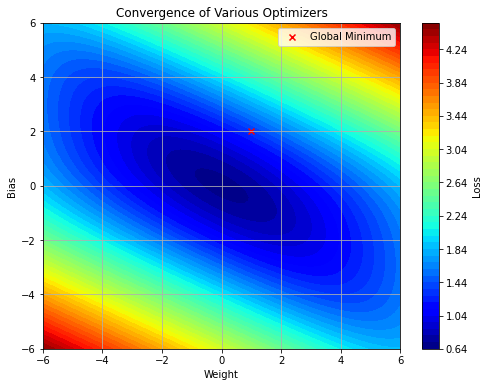

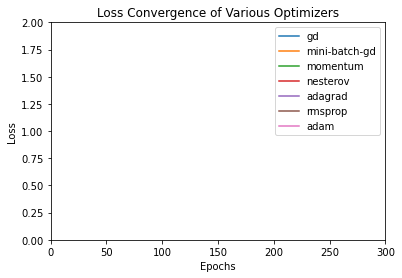

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class SigmoidNeuron:
    def __init__(self):
        self.W = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        if self.W is None or self.b is None:
            raise ValueError("Model parameters are not initialized.")
        return self.sigmoid(np.dot(X, self.W) + self.b)

    def compute_loss(self, y_true, y_pred):
        y_true = y_true.reshape(-1, 1)  # Reshape y_true to (4, 1)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def compute_gradients(self, X, y_true):
        m = X.shape[0]
        y_pred = self.forward(X)
        dW = np.dot(X.T, (y_pred - y_true)) / m
        db = np.sum(y_pred - y_true) / m
        return dW, db

    def fit(self, X, y, optimizer='gd', learning_rate=0.01, epochs=100, batch_size=32, gamma=0.9, epsilon=1e-8, beta1=0.9, beta2=0.999):
        self.W = np.random.randn(X.shape[1])
        self.b = 0

        if optimizer == 'gd':
            self.gradient_descent(X, y, learning_rate, epochs)
        elif optimizer == 'mini-batch-gd':
            self.mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size)
        elif optimizer == 'momentum':
            self.momentum_gradient_descent(X, y, learning_rate, epochs, gamma)
        elif optimizer == 'nesterov':
            self.nesterov_accelerated_gd(X, y, learning_rate, epochs, gamma)
        elif optimizer == 'adagrad':
            self.adagrad(X, y, learning_rate, epochs, epsilon)
        elif optimizer == 'rmsprop':
            self.rmsprop(X, y, learning_rate, epochs, gamma, epsilon)
        elif optimizer == 'adam':
            self.adam(X, y, learning_rate, epochs, beta1, beta2, epsilon)
        else:
            raise ValueError("Invalid optimizer specified.")

    def gradient_descent(self, X, y, learning_rate, epochs):
        losses = []
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            self.W -= learning_rate * dW
            self.b -= learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def mini_batch_gradient_descent(self, X, y, learning_rate, epochs, batch_size):
        losses = []
        m = X.shape[0]
        for epoch in range(epochs):
            indices = np.random.permutation(m)
            for i in range(0, m, batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch, y_batch = X[batch_indices], y[batch_indices]
                dW, db = self.compute_gradients(X_batch, y_batch)
                self.W -= learning_rate * dW
                self.b -= learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def momentum_gradient_descent(self, X, y, learning_rate, epochs, gamma):
        losses = []
        velocity_W, velocity_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            velocity_W = gamma * velocity_W + learning_rate * dW
            velocity_b = gamma * velocity_b + learning_rate * db
            self.W -= velocity_W
            self.b -= velocity_b
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def nesterov_accelerated_gd(self, X, y, learning_rate, epochs, gamma):
        losses = []
        velocity_W, velocity_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            velocity_W = gamma * velocity_W + learning_rate * dW
            velocity_b = gamma * velocity_b + learning_rate * db
            self.W -= gamma * velocity_W + learning_rate * dW
            self.b -= gamma * velocity_b + learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def adagrad(self, X, y, learning_rate, epochs, epsilon):
        losses = []
        cache_W, cache_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            cache_W += dW**2
            cache_b += db**2
            self.W -= learning_rate * dW / (np.sqrt(cache_W) + epsilon)
            self.b -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def rmsprop(self, X, y, learning_rate, epochs, gamma, epsilon):
        losses = []
        cache_W, cache_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            cache_W = gamma * cache_W + (1 - gamma) * dW**2
            cache_b = gamma * cache_b + (1 - gamma) * db**2
            self.W -= learning_rate * dW / (np.sqrt(cache_W) + epsilon)
            self.b -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def adam(self, X, y, learning_rate, epochs, beta1, beta2, epsilon):
        losses = []
        m_W, m_b = np.zeros_like(self.W), 0
        v_W, v_b = np.zeros_like(self.W), 0
        t = 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            t += 1
            m_W = beta1 * m_W + (1 - beta1) * dW
            m_b = beta1 * m_b + (1 - beta1) * db
            v_W = beta2 * v_W + (1 - beta2) * dW**2
            v_b = beta2 * v_b + (1 - beta2) * db**2
            m_W_hat = m_W / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_W_hat = v_W / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)
            self.W -= learning_rate * m_W_hat / (np.sqrt(v_W_hat) + epsilon)
            self.b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

# Helper function to create 2D contour plot
def plot_contour(X, Y, Z, title):
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='jet')
    plt.colorbar(label='Loss')
    plt.xlabel('Weight')
    plt.ylabel('Bias')
    plt.title(title)
    plt.scatter(1, 2, color='red', marker='x', label='Global Minimum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate data for contour plot
def generate_data():
    weight_range = np.linspace(-6, 6, 100)
    bias_range = np.linspace(-6, 6, 100)
    W, B = np.meshgrid(weight_range, bias_range)
    loss = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            sigmoid_neuron = SigmoidNeuron()
            sigmoid_neuron.W = W[i, j]
            sigmoid_neuron.b = B[i, j]
            loss[i, j] = sigmoid_neuron.compute_loss(y, sigmoid_neuron.forward(X))

    return W, B, loss

# Animation function for convergence visualization
def animate(i):
    for optimizer in optimizers:
        losses[optimizer].append(sigmoid_neuron[optimizer].compute_loss(y, sigmoid_neuron[optimizer].forward(X)))
        line[optimizer].set_data(range(len(losses[optimizer])), losses[optimizer])
    return [line[optimizer] for optimizer in optimizers]

# Main code
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

optimizers = ['gd', 'mini-batch-gd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']
sigmoid_neuron = {optimizer: SigmoidNeuron() for optimizer in optimizers}
losses = {optimizer: [] for optimizer in optimizers}

# Train the sigmoid neuron with various optimizers
for optimizer in optimizers:
    sigmoid_neuron[optimizer].fit(X, y, optimizer=optimizer, learning_rate=0.1, epochs=300)

# Create 2D contour plot
W, B, loss = generate_data()
plot_contour(W, B, loss, "Convergence of Various Optimizers")

# Create animation to visualize convergence
fig, ax = plt.subplots()
line = {optimizer: ax.plot([], [], label=optimizer)[0] for optimizer in optimizers}
ax.set_xlim(0, 300)
ax.set_ylim(0, 2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss Convergence of Various Optimizers')
ax.legend(loc='upper right')

animation = FuncAnimation(fig, animate, frames=300, interval=200, blit=True)
plt.show()


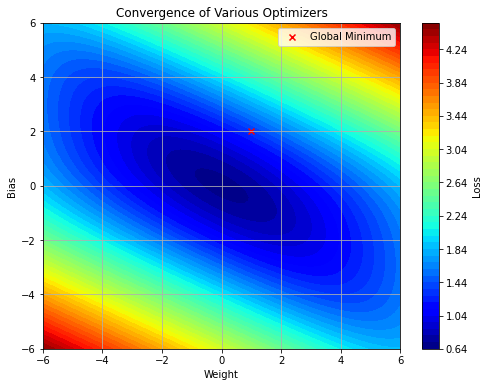

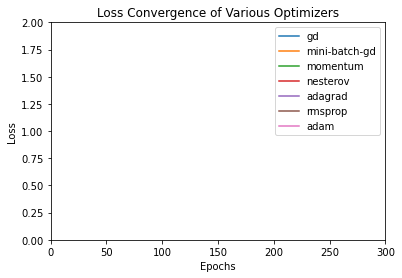

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class SigmoidNeuron:
    def __init__(self):
        self.W = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        if self.W is None or self.b is None:
            raise ValueError("Model parameters are not initialized.")
        return self.sigmoid(np.dot(X, self.W) + self.b)

    def compute_loss(self, y_true, y_pred):
        y_true = y_true.reshape(-1, 1)  # Reshape y_true to (4, 1)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def compute_gradients(self, X, y_true):
        m = X.shape[0]
        y_pred = self.forward(X)
        dW = np.dot(X.T, (y_pred - y_true)) / m
        db = np.sum(y_pred - y_true) / m
        return dW, db

    def fit(self, X, y, optimizer='gd', learning_rate=0.01, epochs=100, batch_size=32, gamma=0.9, epsilon=1e-8, beta1=0.9, beta2=0.999):
        self.W = np.random.randn(X.shape[1])
        self.b = 0

        if optimizer == 'gd':
            self.gradient_descent(X, y, learning_rate, epochs)
        elif optimizer == 'mini-batch-gd':
            self.mini_batch_gradient_descent(X, y, learning_rate, epochs, batch_size)
        elif optimizer == 'momentum':
            self.momentum_gradient_descent(X, y, learning_rate, epochs, gamma)
        elif optimizer == 'nesterov':
            self.nesterov_accelerated_gd(X, y, learning_rate, epochs, gamma)
        elif optimizer == 'adagrad':
            self.adagrad(X, y, learning_rate, epochs, epsilon)
        elif optimizer == 'rmsprop':
            self.rmsprop(X, y, learning_rate, epochs, gamma, epsilon)
        elif optimizer == 'adam':
            self.adam(X, y, learning_rate, epochs, beta1, beta2, epsilon)
        else:
            raise ValueError("Invalid optimizer specified.")

    def gradient_descent(self, X, y, learning_rate, epochs):
        losses = []
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            self.W -= learning_rate * dW
            self.b -= learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def mini_batch_gradient_descent(self, X, y, learning_rate, epochs, batch_size):
        losses = []
        m = X.shape[0]
        for epoch in range(epochs):
            indices = np.random.permutation(m)
            for i in range(0, m, batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch, y_batch = X[batch_indices], y[batch_indices]
                dW, db = self.compute_gradients(X_batch, y_batch)
                self.W -= learning_rate * dW
                self.b -= learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def momentum_gradient_descent(self, X, y, learning_rate, epochs, gamma):
        losses = []
        velocity_W, velocity_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            velocity_W = gamma * velocity_W + learning_rate * dW
            velocity_b = gamma * velocity_b + learning_rate * db
            self.W -= velocity_W
            self.b -= velocity_b
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def nesterov_accelerated_gd(self, X, y, learning_rate, epochs, gamma):
        losses = []
        velocity_W, velocity_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            velocity_W = gamma * velocity_W + learning_rate * dW
            velocity_b = gamma * velocity_b + learning_rate * db
            self.W -= gamma * velocity_W + learning_rate * dW
            self.b -= gamma * velocity_b + learning_rate * db
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def adagrad(self, X, y, learning_rate, epochs, epsilon):
        losses = []
        cache_W, cache_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            cache_W += dW**2
            cache_b += db**2
            self.W -= learning_rate * dW / (np.sqrt(cache_W) + epsilon)
            self.b -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def rmsprop(self, X, y, learning_rate, epochs, gamma, epsilon):
        losses = []
        cache_W, cache_b = np.zeros_like(self.W), 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            cache_W = gamma * cache_W + (1 - gamma) * dW**2
            cache_b = gamma * cache_b + (1 - gamma) * db**2
            self.W -= learning_rate * dW / (np.sqrt(cache_W) + epsilon)
            self.b -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

    def adam(self, X, y, learning_rate, epochs, beta1, beta2, epsilon):
        losses = []
        m_W, m_b = np.zeros_like(self.W), 0
        v_W, v_b = np.zeros_like(self.W), 0
        t = 0
        for epoch in range(epochs):
            dW, db = self.compute_gradients(X, y)
            t += 1
            m_W = beta1 * m_W + (1 - beta1) * dW
            m_b = beta1 * m_b + (1 - beta1) * db
            v_W = beta2 * v_W + (1 - beta2) * dW**2
            v_b = beta2 * v_b + (1 - beta2) * db**2
            m_W_hat = m_W / (1 - beta1**t)
            m_b_hat = m_b / (1 - beta1**t)
            v_W_hat = v_W / (1 - beta2**t)
            v_b_hat = v_b / (1 - beta2**t)
            self.W -= learning_rate * m_W_hat / (np.sqrt(v_W_hat) + epsilon)
            self.b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)
            loss = self.compute_loss(y, self.forward(X))
            losses.append(loss)
        return losses

# Helper function to create 2D contour plot
def plot_contour(X, Y, Z, title):
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='jet')
    plt.colorbar(label='Loss')
    plt.xlabel('Weight')
    plt.ylabel('Bias')
    plt.title(title)
    plt.scatter(1, 2, color='red', marker='x', label='Global Minimum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate data for contour plot
def generate_data():
    weight_range = np.linspace(-6, 6, 100)
    bias_range = np.linspace(-6, 6, 100)
    W, B = np.meshgrid(weight_range, bias_range)
    loss = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            sigmoid_neuron = SigmoidNeuron()
            sigmoid_neuron.W = W[i, j]
            sigmoid_neuron.b = B[i, j]
            loss[i, j] = sigmoid_neuron.compute_loss(y, sigmoid_neuron.forward(X))

    return W, B, loss

# Animation function for convergence visualization
def animate(i):
    for optimizer in optimizers:
        losses[optimizer].append(sigmoid_neuron[optimizer].compute_loss(y, sigmoid_neuron[optimizer].forward(X)))
        line[optimizer].set_data(range(len(losses[optimizer])), losses[optimizer])
    return [line[optimizer] for optimizer in optimizers]

# Main code
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

optimizers = ['gd', 'mini-batch-gd', 'momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']
sigmoid_neuron = {optimizer: SigmoidNeuron() for optimizer in optimizers}
losses = {optimizer: [] for optimizer in optimizers}

# Train the sigmoid neuron with various optimizers
for optimizer in optimizers:
    sigmoid_neuron[optimizer].fit(X, y, optimizer=optimizer, learning_rate=0.1, epochs=300)

# Create 2D contour plot
W, B, loss = generate_data()
plot_contour(W, B, loss, "Convergence of Various Optimizers")

# Create animation to visualize convergence
fig, ax = plt.subplots()
line = {optimizer: ax.plot([], [], label=optimizer)[0] for optimizer in optimizers}
ax.set_xlim(0, 300)
ax.set_ylim(0, 2)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss Convergence of Various Optimizers')
ax.legend(loc='upper right')

animation = FuncAnimation(fig, animate, frames=300, interval=200, blit=True)
plt.show()
